In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import yfinance as yf

In [2]:
import datetime
Now=datetime.datetime.now()
print(f'This project is done on This day: {Now:%B %d, %Y}')

This project is done on This day: July 08, 2023


In [4]:
df=yf.download('BTC-USD',start='2015-01-01',end=Now)

df.info()

[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3110 entries, 2015-01-01 to 2023-07-07
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3110 non-null   float64
 1   High       3110 non-null   float64
 2   Low        3110 non-null   float64
 3   Close      3110 non-null   float64
 4   Adj Close  3110 non-null   float64
 5   Volume     3110 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 170.1 KB


In [5]:
#am going to call on pandasAI to Help us with the Columns Clarification

import sketch 

df.sketch.ask('What all about this dataset?')

In [6]:
df.sketch.ask('In friendly ways can you give me single sentence decsription of each column? (format output as HTML list)')

**NOTE**

**BTC/USD** refers to the cryptocurrency exchange rate between Bitcoin (BTC) and the United States Dollar (USD). It represents the value of one Bitcoin in terms of US dollars. This exchange rate is widely used in the cryptocurrency market for trading and investment purposes. so we will be carrying out this Exploratory Analysis and Finance analysis.

we start from 2015-01-01 to the present Day.

We the help of yfinance library i was able to get/download this data.

In [6]:
#le vview the note book

df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


So by default the date ave been set as index.

In [7]:
#let check for the Statistics summary


df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3108.000000,3108.000000,3108.000000,3108.000000,3108.000000,3.108000e+03
mean,14043.103181,14386.935076,13666.943805,14051.418538,14051.418538,1.714343e+10
std,16095.078366,16498.968672,15633.536260,16092.649223,16092.649223,1.961495e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,7.860650e+06
25%,1030.597473,1048.670044,1012.855011,1035.032501,1035.032501,2.249305e+08
50%,8051.509277,8227.814941,7841.081787,8050.035400,8050.035400,1.218791e+10
75%,20646.958008,21163.364746,20257.836426,20694.235352,20694.235352,2.822483e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [8]:
df.sketch.ask('can you me a friendly detail on descriptive statistics on this dataset? (format output as HTML list)')

In [9]:
df.describe().T.sketch.ask('can you me a friendly detail on descriptive statistics on this dataset? (format output as HTML list)')

As we can seee, The lowest Minimum opening Stock trader is 176 on the same length the hihgest opening stock is 67549

this simply have tell us how the trading live market have grow over the years. 

In [10]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800


<AxesSubplot:xlabel='Date'>

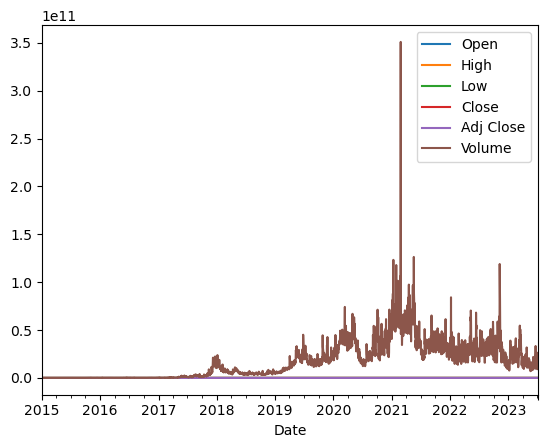

In [11]:
#first visualsation

(df.plot())

<AxesSubplot:title={'center':'Yearly %_Change'}, xlabel='Date'>

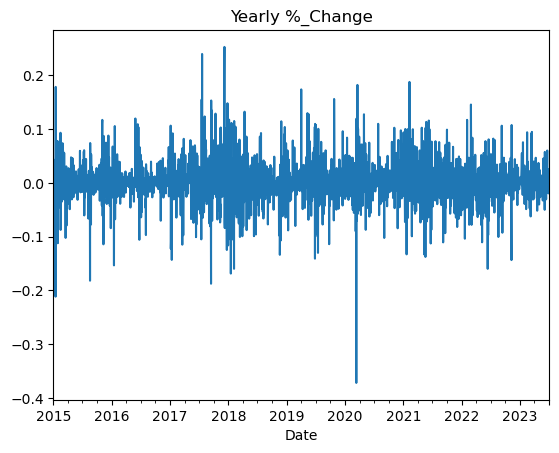

In [12]:
df['%_change']=df['Adj Close'].pct_change()

df['%_change'].plot(title='Yearly %_Change')

The Percentage Change in the Adjusted Close of stock in 2020 spark down. According the visualization is the only year we really have a down spark down

Text(0.5, 1.0, 'fig.2 \n Low & High Trade 2015 to 2023')

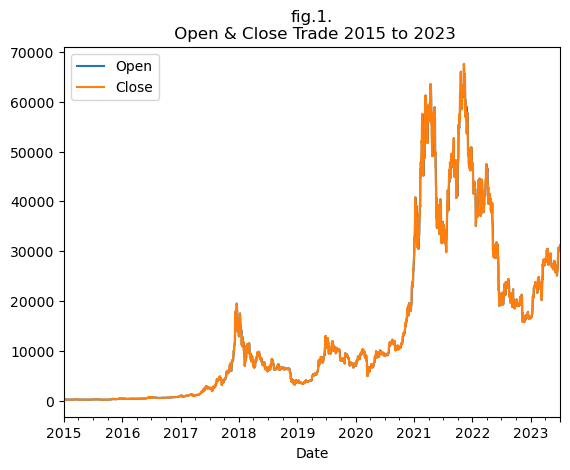

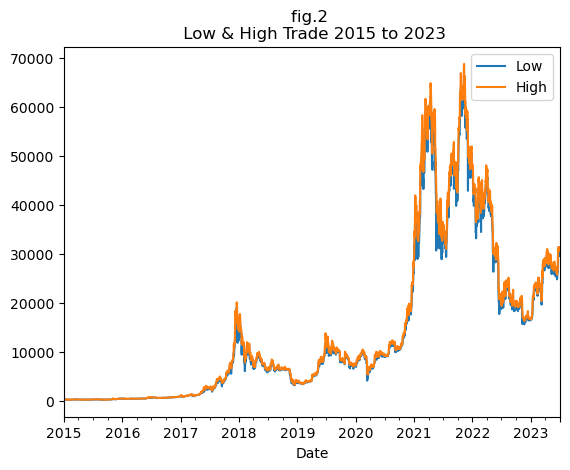

In [34]:
df[['Open','Close']].plot()
plt.title('fig.1.\n Open & Close Trade 2015 to 2023')
df[['Low','High']].plot()
plt.title('fig.2 \n Low & High Trade 2015 to 2023')

Note in the figure 1, in the visualization we barely see another color except from Close. that is to say
the open and close trade in every single day open and close that same price.

while in figure Two, we can See clearly  both the high and low price stocks, that is to say we can say atleast there is a price differences.

<AxesSubplot:xlabel='Date'>

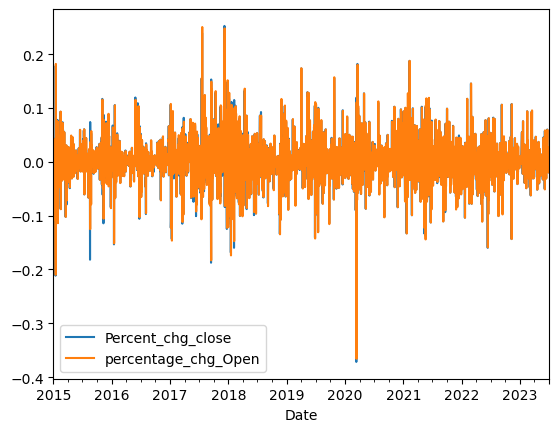

In [13]:
#let lOok at The percentage change Over time

(df.assign(Percent_chg_close=df['Close'].pct_change(),
          percentage_chg_Open=df['Open'].pct_change())[['Percent_chg_close','percentage_chg_Open']].plot())

No too much signifiicant change or differences In the opening Closing Stock.

<AxesSubplot:xlabel='Date'>

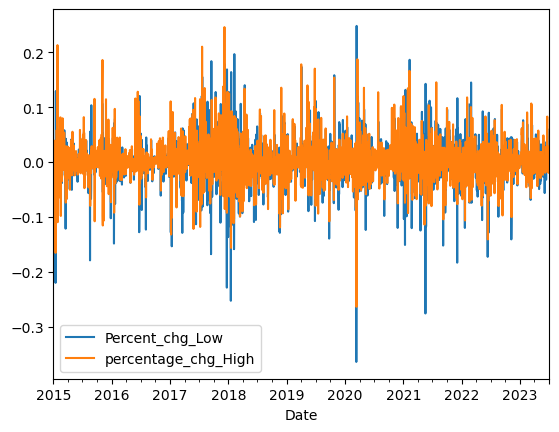

In [14]:
(df.assign(Percent_chg_Low=df['Low'].pct_change(),
          percentage_chg_High=df['High'].pct_change())[['Percent_chg_Low','percentage_chg_High']].plot())

There Is BIG Of differeneces bewtween low and high percentage change, unlike on open and close chart we plot.

If you Would Observe closely to the trend Line for each quater of the Year, There always up and down of the price stock of market.this open for more granularity of the pattern of the data.

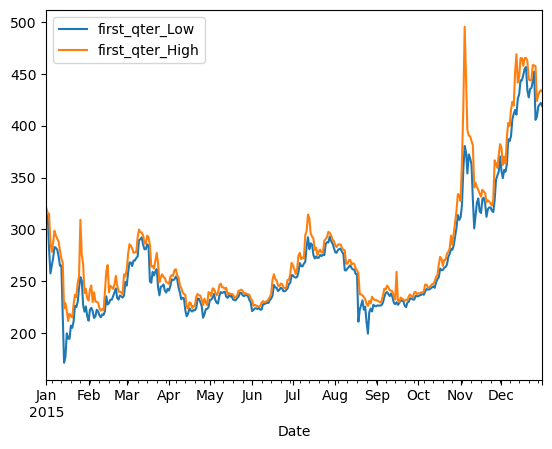

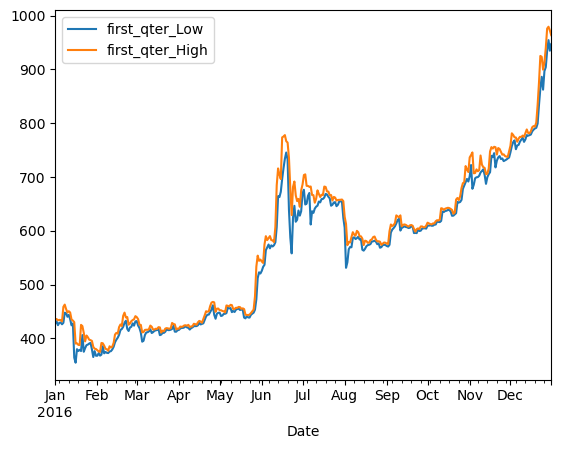

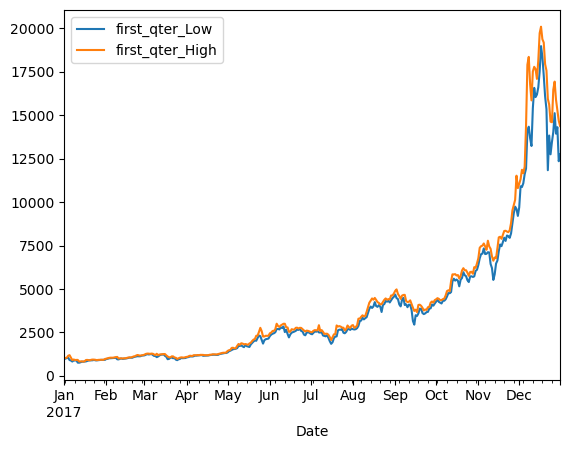

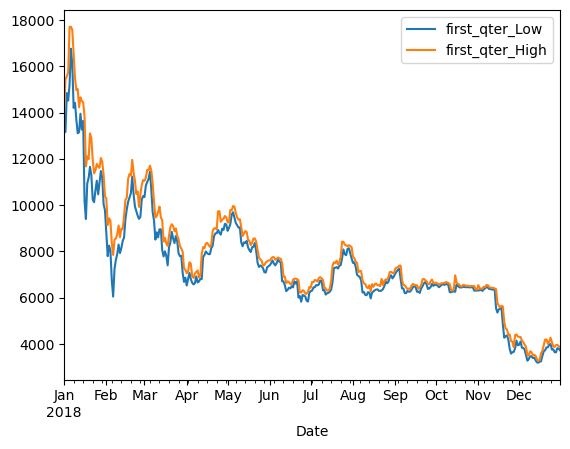

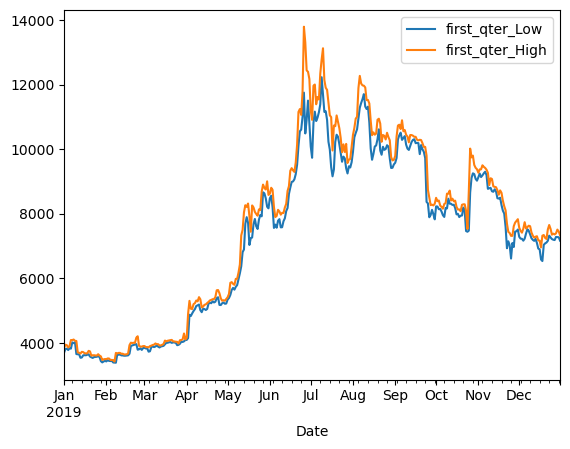

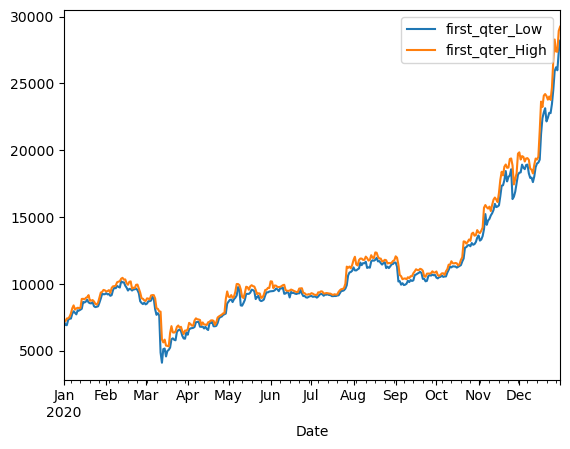

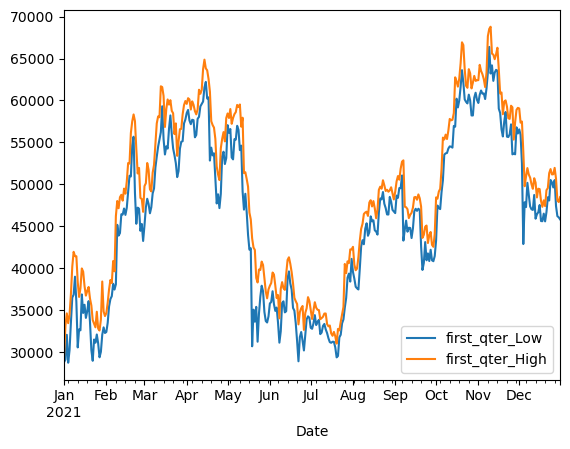

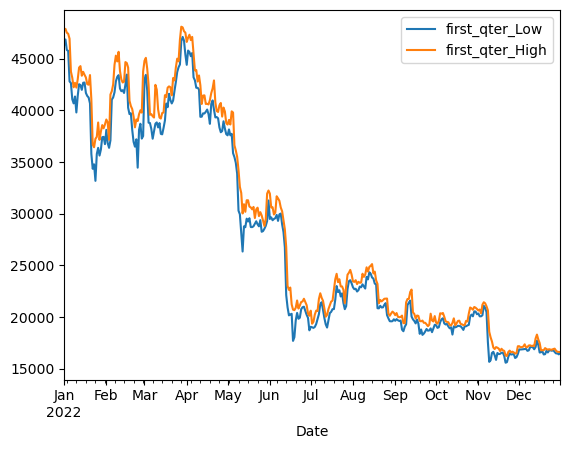

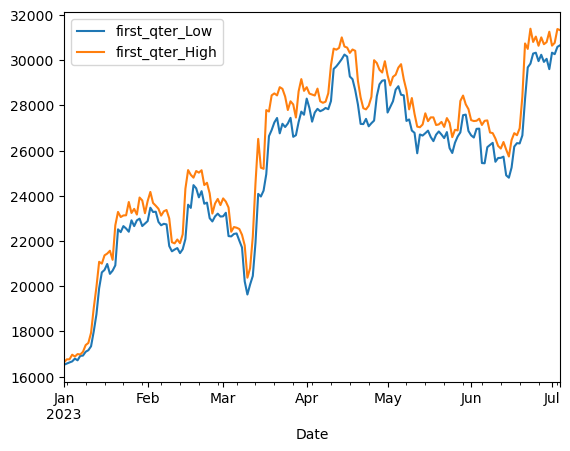

In [55]:
#columns low and high, let plot for Yearly trend, let really see what happening

(df.assign(first_qter_Low=df['Low'],
          first_qter_High=df['High']).resample('Y')[['first_qter_Low','first_qter_High']].plot(title("Low Vs High")));

Observation:
Pay close attention to the trend Line Yearly, you will see different price tage it varies very year.

starting from 2015 the price begin to move from 300 then spark up to 500 for firstime ever since then the price spark up the trend line have been volatal.

In [59]:
#Let plot a candle xstick plot to clearly see what happen 

figure(figsize=(18,6),dpi=90)
def candle_stick(df,ax):
    #RED DECRASE
    ax.vlines(x=df.index,ymin=df.low,yax=df.High,color='k',linewidth=1)
    red-df.query('Open>Close')
    ax.vlines(x=red.index,ymin=green,max=red.Open,color='r',linewidth=3)
    #GREEN increase
    green=df.query(Open<=Close)
    ax.vlines(x=green.index,ymin=green.Close,ymax=green.Open,color='g',linewidth=3)
    ax.xaxis_set.ma

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800


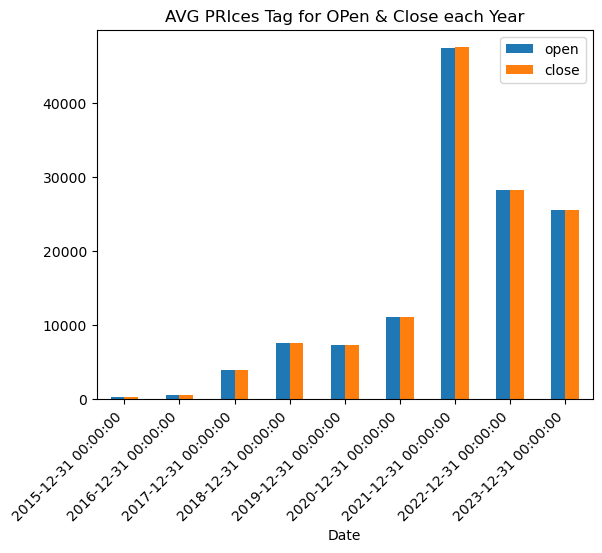

In [76]:
(df.assign(open=df['Open'],
          close=df['Close']).resample('Y')['open','close'].mean().plot(kind='bar'))
plt.title('AVG PRIces Tag for OPen & Close each Year')
plt.xticks(rotation=45,ha='right');

According to The visualization, The Highest Open and close price trade happen In the year 2021.

<AxesSubplot:title={'center':'Rolling Average for Opening Stock'}, xlabel='Date'>

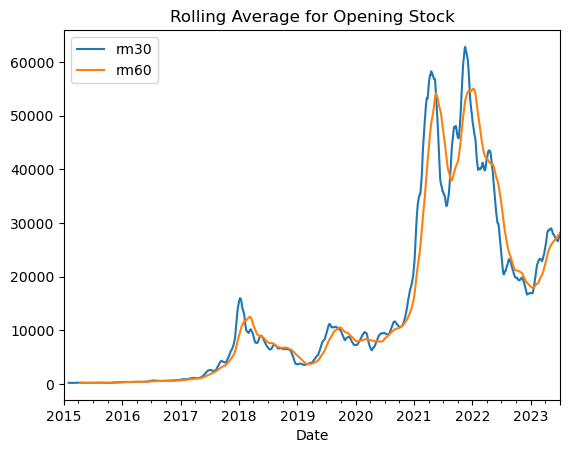

In [86]:
(df.assign(rm30=df['Open'].rolling(30).mean(),
          rm60=df['Open'].rolling(100).mean())[['rm30','rm60']].plot(title='Rolling Average for Opening Stock'))

In 2021 there was a spark In price open market later come down And Later went up again in 2022 but time around Went little higher
than the 2021 Open price Stock.

<AxesSubplot:title={'center':'Rolling Average for Opening Stock'}, xlabel='Date'>

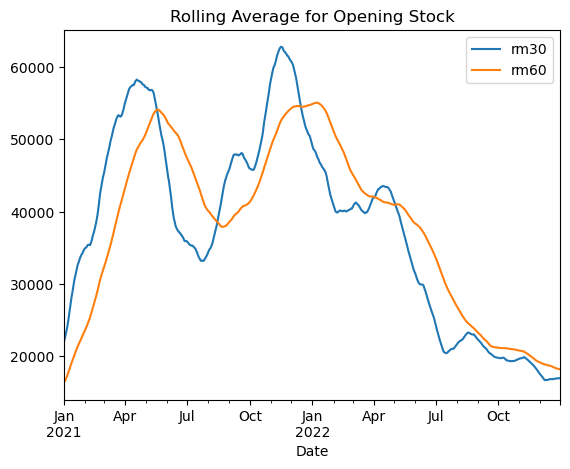

In [92]:
#let a take A Look At what happen in 2021 and 2022.

(df.assign(rm30=df['Open'].rolling(30).mean(),
          rm60=df['Open'].rolling(100).mean())[['rm30','rm60']].loc['jan 2021':'Dec 2022'].plot(title='Rolling Average for Opening Stock'))

<AxesSubplot:title={'center':'Number of Trader'}, xlabel='Date'>

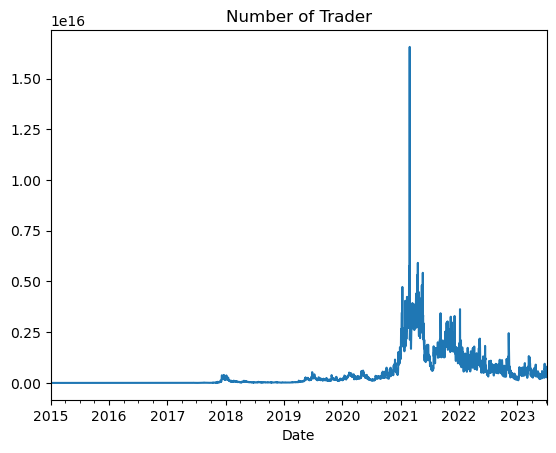

In [97]:
df['total_trader']=df['Open']*df['Volume']

df['total_trader'].plot(title='Number of Trader')

2021 Large Numer of of Trader are in are in Market.


In [110]:
from statsmodels.tsa.ar_model import AutoReg

In [111]:
df.shape

(3107, 7)

In [116]:
model=AutoReg(df['Open'],lags=1)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [117]:
result=model.fit()

In [118]:
print(result.params)

const      26.486533
Open.L1     0.998820
dtype: float64


In [119]:
df.shape

(3107, 7)

In [120]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,total_trader
Date,,,,,,,
2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550,2.575192e+09
2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650,2.468865e+09
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400,1.040705e+10
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100,1.563990e+10
2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800,1.165384e+10


In [123]:
df=df.drop('total_trader',axis=1)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800


In [124]:
df.shape

(3107, 6)

In [ ]:
train=df